<a href="https://colab.research.google.com/github/sarang-manohar/hogwarts/blob/main/Sarang_Manohar_Data_mining_project_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv(r'insurance_part2_data.csv')
raw_data.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [3]:
raw_data.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [5]:
raw_data.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

In [6]:
for x in ['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel','Duration', 'Sales', 'Product Name', 'Destination']:
    print(x.upper(),':',raw_data[x].nunique())
    print(raw_data[x].value_counts())
    print('\n')

AGE : 70
36    999
31    125
48    108
30     96
35     94
     ... 
11      1
84      1
15      1
77      1
8       1
Name: Age, Length: 70, dtype: int64


AGENCY_CODE : 4
EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64


TYPE : 2
Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64


CLAIMED : 2
No     2076
Yes     924
Name: Claimed, dtype: int64


COMMISION : 324
0.00     1366
63.21      62
54.00      61
23.76      61
7.70       57
         ... 
67.75       1
17.29       1
18.13       1
49.40       1
0.18        1
Name: Commision, Length: 324, dtype: int64


CHANNEL : 2
Online     2954
Offline      46
Name: Channel, dtype: int64


DURATION : 257
 8       83
 5       82
 6       81
 10      81
 11      81
         ..
 466      1
 421      1
-1        1
 119      1
 4580     1
Name: Duration, Length: 257, dtype: int64


SALES : 380
20.00     225
10.00     163
22.00      79
252.85     60
216.00     59
         ... 
199.00      1
177.00   

In [7]:
raw_data.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [8]:
raw_data[raw_data.Age<18]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
480,17,C2B,Airlines,No,20.38,Online,21,81.5,Silver Plan,ASIA
1064,17,C2B,Airlines,Yes,51.75,Online,64,207.0,Gold Plan,ASIA
1273,14,CWT,Travel Agency,Yes,10.50,Offline,31,30.0,Customised Plan,ASIA
1558,8,CWT,Travel Agency,No,9.57,Offline,50,29.0,Customised Plan,ASIA
1673,16,C2B,Airlines,Yes,54.00,Online,373,216.0,Silver Plan,ASIA
1940,15,CWT,Travel Agency,No,10.50,Offline,53,30.0,Customised Plan,ASIA
1962,17,C2B,Airlines,Yes,5.00,Online,9,20.0,Bronze Plan,ASIA
2724,11,C2B,Airlines,No,15.75,Online,27,63.0,Silver Plan,ASIA
2987,16,C2B,Airlines,Yes,15.00,Online,15,60.0,Bronze Plan,ASIA


In [9]:
raw_data[raw_data.Duration<1]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
1508,25,JZI,Airlines,No,6.30,Online,-1,18.00,Bronze Plan,ASIA
1746,48,C2B,Airlines,No,0.14,Online,0,0.51,Customised Plan,ASIA
2628,37,C2B,Airlines,No,49.60,Online,0,124.00,Bronze Plan,ASIA


In [10]:
raw_data.Duration.mean()

70.00133333333333

In [11]:
raw_data.Duration.median()

26.5

In [12]:
raw_data[raw_data.duplicated()==True]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [13]:
raw_data.skew()

Age           1.149713
Commision     3.148858
Duration     13.784681
Sales         2.381148
dtype: float64

In [14]:
for feature in raw_data.columns: 
    if raw_data[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(raw_data[feature].unique()))
        print(pd.Categorical(raw_data[feature].unique()).codes)
        raw_data[feature] = pd.Categorical(raw_data[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan',
                         'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [15]:
raw_data.sample(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2893,36,2,1,1,0.00,1,223,28.00,2,0
2730,36,2,1,0,0.00,1,63,10.00,1,0
2671,36,2,1,0,0.00,1,218,21.00,2,0
2987,16,0,0,1,15.00,1,15,60.00,0,0
167,19,1,1,0,10.50,0,22,30.00,2,0
141,68,2,1,0,0.00,1,50,87.00,2,1
1115,28,0,0,0,7.64,1,66,30.55,0,0
2333,48,0,0,0,5.63,1,10,22.50,4,0
189,60,3,0,0,6.30,1,18,18.00,0,0
2663,25,0,0,0,3.38,1,3,13.50,0,0


In [16]:
X = raw_data.drop(['Claimed'], axis=1)
y = raw_data.pop('Claimed')

In [17]:
X_train, X_test, train_labels, test_labels = train_test_split(X,y,test_size=0.3, random_state=1)

In [18]:
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(X_train, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
import sys

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz
import sys
import os
# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/../")

from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

     |████████████████████████████████| 61kB 2.3MB/s 


In [20]:
np.random.randint(0, len(raw_data))

2790

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


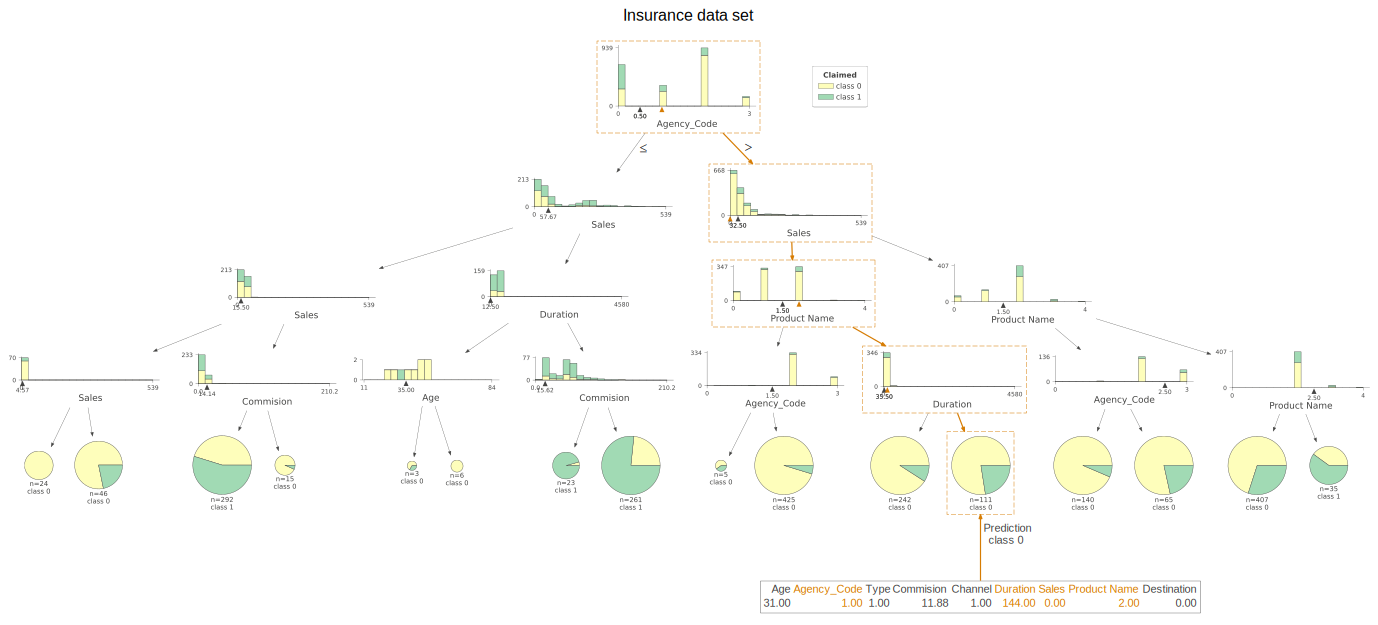

In [21]:
from sklearn import tree
regr = tree.DecisionTreeClassifier(max_depth=4)

regr.fit(X_train, train_labels)

X = raw_data.loc[np.random.randint(0, len(raw_data))]

viz = dtreeviz(regr,
               X_train,
               train_labels,
               target_name='Claimed',  # this name will be displayed at the leaf node
               feature_names=raw_data.columns,
               title="Insurance data set",
               fontname="Arial",
               title_fontsize=16,
               colors = {"title":"black"},
               X=X
              )
viz
# viz.view() will give give a popup with graph in pdf

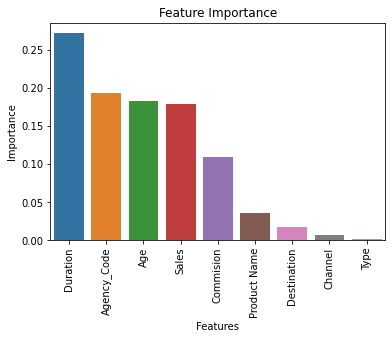

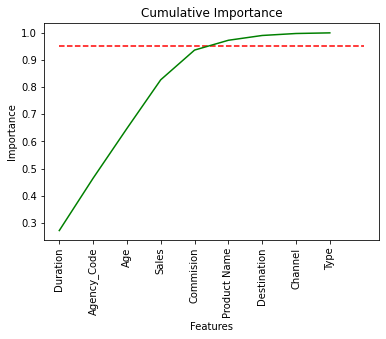

In [22]:
importances = pd.DataFrame(dt.feature_importances_, columns = ['Imp'], index = X_train.columns)
importances['features'] = pd.DataFrame(dt.feature_importances_, columns = ['Imp'], index = X_train.columns).index
importances.reset_index

importances = importances.sort_values(by='Imp', ascending=False)
importances.set_index(np.arange(0,importances.shape[0]),inplace = True)

importances['cumsum'] = np.cumsum(importances.Imp)
x_vals = list(range(len(importances)))

sns.barplot(data = importances, x='features', y='Imp')
plt.xticks(x_vals, importances['features'], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Feature Importance');
plt.show()

plt.plot(x_vals, importances['cumsum'], 'g-')
plt.hlines(y = 0.95, xmin=0, xmax=len(importances), color = 'r', linestyles = 'dashed')
plt.xticks(x_vals, importances['features'], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Cumulative Importance');
plt.show()

In [95]:
dt_param_grid = {
    'max_depth' : [6],
    'min_samples_leaf' : [15],
    'min_samples_split' : [50]
}
dt_ht = DecisionTreeClassifier()
dt_gs = GridSearchCV(estimator=dt_ht, param_grid=dt_param_grid, cv = 3)
dt_gs.fit(X_train, train_labels)
print(dt_gs.best_params_)
best_dt = dt_gs.best_estimator_
ytrain_predict = best_dt.predict(X_train)
ytest_predict = best_dt.predict(X_test)

{'max_depth': 6, 'min_samples_leaf': 15, 'min_samples_split': 50}


In [38]:
#{'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 40}
#Train data Confusion Matrix
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print(best_dt.score(X_train,train_labels) )
print(classification_report(train_labels, ytrain_predict))

[[1299  172]
 [ 251  378]]
0.7985714285714286
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1471
           1       0.69      0.60      0.64       629

    accuracy                           0.80      2100
   macro avg       0.76      0.74      0.75      2100
weighted avg       0.79      0.80      0.79      2100



In [93]:
#{'max_depth': 6, 'min_samples_leaf': 20, 'min_samples_split': 60}
#Train data Confusion Matrix
print('Decision tree stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_dt.score(X_train,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Decision tree stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_dt.score(X_test,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Decision tree stats on train data:
[[1321  150]
 [ 269  360]]
Accuracy score : 80.0 percent
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1471
           1       0.71      0.57      0.63       629

    accuracy                           0.80      2100
   macro avg       0.77      0.74      0.75      2100
weighted avg       0.79      0.80      0.79      2100



Decision tree stats on test data:
[[555  50]
 [167 128]]
Accuracy score : 75.9 percent
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       605
           1       0.72      0.43      0.54       295

    accuracy                           0.76       900
   macro avg       0.74      0.68      0.69       900
weighted avg       0.75      0.76      0.74       900



###### Best set of hyper parameters with accuracy score difference of ***2%*** between train and test data is 

---
**{'max_depth': 6, 'min_samples_leaf': 15, 'min_samples_split': 50}**


In [97]:
#{'max_depth': 6, 'min_samples_leaf': 15, 'min_samples_split': 50}
#Train data Confusion Matrix
print('Decision tree stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_dt.score(X_train,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Decision tree stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_dt.score(X_test,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Decision tree stats on train data:
[[1271  200]
 [ 222  407]]
Accuracy score : 79.9 percent
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1471
           1       0.67      0.65      0.66       629

    accuracy                           0.80      2100
   macro avg       0.76      0.76      0.76      2100
weighted avg       0.80      0.80      0.80      2100



Decision tree stats on test data:
[[540  65]
 [134 161]]
Accuracy score : 77.9 percent
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       605
           1       0.71      0.55      0.62       295

    accuracy                           0.78       900
   macro avg       0.76      0.72      0.73       900
weighted avg       0.77      0.78      0.77       900



In [87]:
#{'max_depth': 6, 'min_samples_split': 50}
#Train data Confusion Matrix
print('Decision tree stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_dt.score(X_train,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Decision tree stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_dt.score(X_test,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Decision tree stats on train data:
[[1289  182]
 [ 226  403]]
Accuracy score : 80.6 percent
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1471
           1       0.69      0.64      0.66       629

    accuracy                           0.81      2100
   macro avg       0.77      0.76      0.76      2100
weighted avg       0.80      0.81      0.80      2100



Decision tree stats on test data:
[[539  66]
 [137 158]]
Accuracy score : 77.4 percent
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       605
           1       0.71      0.54      0.61       295

    accuracy                           0.77       900
   macro avg       0.75      0.71      0.73       900
weighted avg       0.77      0.77      0.77       900



In [85]:
#{'min_samples_split': 50}
#Train data Confusion Matrix
print('Decision tree stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_dt.score(X_train,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Decision tree stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_dt.score(X_test,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Decision tree stats on train data:
[[1304  167]
 [ 192  437]]
Accuracy score : 82.9 percent
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1471
           1       0.72      0.69      0.71       629

    accuracy                           0.83      2100
   macro avg       0.80      0.79      0.79      2100
weighted avg       0.83      0.83      0.83      2100



Decision tree stats on test data:
[[524  81]
 [143 152]]
Accuracy score : 75.1 percent
              precision    recall  f1-score   support

           0       0.79      0.87      0.82       605
           1       0.65      0.52      0.58       295

    accuracy                           0.75       900
   macro avg       0.72      0.69      0.70       900
weighted avg       0.74      0.75      0.74       900



In [69]:
#{'min_samples_split': 30}
#Train data Confusion Matrix
print('Decision tree stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print(best_dt.score(X_train,train_labels) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Decision tree stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print(best_dt.score(X_test,test_labels) )
print(classification_report(test_labels, ytest_predict))

Decision tree stats on train data:
[[1331  140]
 [ 192  437]]
0.8419047619047619
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1471
           1       0.76      0.69      0.72       629

    accuracy                           0.84      2100
   macro avg       0.82      0.80      0.81      2100
weighted avg       0.84      0.84      0.84      2100



Decision tree stats on test data:
[[512  93]
 [155 140]]
0.7244444444444444
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       605
           1       0.60      0.47      0.53       295

    accuracy                           0.72       900
   macro avg       0.68      0.66      0.67       900
weighted avg       0.71      0.72      0.71       900



In [67]:
#{'min_samples_split': 10}
#Train data Confusion Matrix
print('Decision tree stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print(best_dt.score(X_train,train_labels) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Decision tree stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print(best_dt.score(X_test,test_labels) )
print(classification_report(test_labels, ytest_predict))

Decision tree stats on train data:
[[1412   59]
 [ 152  477]]
0.8995238095238095
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1471
           1       0.89      0.76      0.82       629

    accuracy                           0.90      2100
   macro avg       0.90      0.86      0.87      2100
weighted avg       0.90      0.90      0.90      2100



Decision tree stats on test data:
[[519  86]
 [168 127]]
0.7177777777777777
              precision    recall  f1-score   support

           0       0.76      0.86      0.80       605
           1       0.60      0.43      0.50       295

    accuracy                           0.72       900
   macro avg       0.68      0.64      0.65       900
weighted avg       0.70      0.72      0.70       900



In [91]:
#{'min_samples_split': 5}
#Train data Confusion Matrix
print('Decision tree stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_dt.score(X_train,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Decision tree stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_dt.score(X_test,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Decision tree stats on train data:
[[1438   33]
 [  93  536]]
Accuracy score : 94.0 percent
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1471
           1       0.94      0.85      0.89       629

    accuracy                           0.94      2100
   macro avg       0.94      0.91      0.93      2100
weighted avg       0.94      0.94      0.94      2100



Decision tree stats on test data:
[[510  95]
 [160 135]]
Accuracy score : 71.7 percent
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       605
           1       0.59      0.46      0.51       295

    accuracy                           0.72       900
   macro avg       0.67      0.65      0.66       900
weighted avg       0.70      0.72      0.71       900



Area under ROC : 84.9 percent
Best Threshold=0.312883, G-Mean=0.767


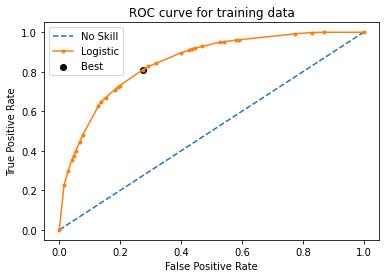

In [105]:
train_prob = best_dt.predict_proba(X_train)[:,1]
train_auc = roc_auc_score(train_labels, train_prob)
print('Area under ROC : %.1f percent' % (train_auc*100) )
fpr, tpr, thresholds = roc_curve(train_labels, train_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for training data')
plt.legend()
# show the plot
plt.show()

Area under ROC : 79.7 percent
Best Threshold=0.270270, G-Mean=0.736


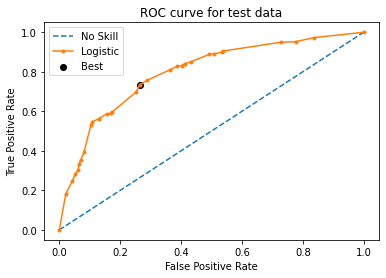

In [104]:
test_prob = best_dt.predict_proba(X_test)[:,1]
test_auc = roc_auc_score(test_labels, test_prob)
print('Area under ROC : %.1f percent' % (test_auc*100) )
fpr, tpr, thresholds = roc_curve(test_labels, test_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for test data')
plt.legend()
# show the plot
plt.show()